https://github.com/woong11111/Youtube-Contents

# 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4
!pip install pillow
!pip install wordcloud
!pip install matplotlib

# 2. 실행코드

## (1) 라이브러리 불러오기

In [2]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager

## (2) 네이버 종목 토론방 긁어오기

In [3]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    for i in range(pages) :
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion_date = []
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            if match != None :
                opinion_date.append(match.group())
        opinion_date = opinion_date[-20:]
        for value in opinion_date : 
            opinion_date_total.append(value)
        opinion = soup.select('.title')
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title']) 
        for i, finger in enumerate(soup.find_all('strong')) : 
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)
            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    return opinion_date_total, opinion_total, chanti, anti

# 종목코드

 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [4]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('005930', 500)

In [5]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})
df.tail()

,날짜,토론제목,찬성,반대
9995,2019.12.15,문희상이 괴물상이라면 이낙연이는 무슨 상판대기,0,0
9996,2019.12.15,●강남아파트값오른들 서민과뭔상관이람 ...극소수에해당되,0,1
9997,2019.12.15,"무능력한 강남좌파 , 아파트폭등 좌파정권 !",0,0
9998,2019.12.15,온 국민이 빚에 눌려 죽겠다. 부동산 대출 회수하라 !,0,0
9999,2019.12.15,문희상 아들에게 국회의원 세습한다는 것이,0,0


## (3) 인간지표 구하기

In [6]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2020.01.02,비정상적인 세계경제,0,0,중립
1,2020.01.02,미국과 세계증시 특히 대만증시가 우주로 우주로 날라가네요,0,0,중립
2,2020.01.02,한시적으로,1,2,안티
3,2020.01.02,"괘활아, , ,괘활아 , ,뭘하니",1,0,찬티
4,2020.01.02,"작년도전세계꼴등, 올해도전세계꼴등상승률",2,0,찬티
5,2020.01.02,영천진성빨괭이kim문수/토론방미취 ㄴ게 kimk/친일압잽비 모건션kim영찬/,0,0,중립
6,2020.01.02,이번기회에 일본과는단교하고,0,2,안티
7,2020.01.02,모든건 바미당이 문제다,3,0,찬티
8,2020.01.02,토론방미취 ㄴ게 kimk/친일압잽비 모건션kim영찬/영천진성빨괭이kim문수,0,1,안티
9,2020.01.02,친일압잽비 모건션kim영찬/토론방미취 ㄴ게 kimk/영천진성빨괭이kim문수,0,1,안티


## (4) 워드클라우드 살펴보기

In [7]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  비정상적인 세계경제 미국과 세계증시 특히 대만증시가 우주로 우주로 날라가네요  한시적으로 괘활아, , ,괘활아  , ,뭘하니 작년도전세계꼴등, 올해도전세계꼴등상승률 영천진성빨괭이kim문수/토론방미취 ㄴ게 kimk/친일압잽비 모건션kim영찬/ 이번기회에 일본과는단교하고 모든건 바미당이 문제다 토론방미취 ㄴ게 kimk/친일압잽비 모건션kim영찬/영천진성빨괭이kim문수 친일압잽비 모건션kim영찬/토론방미취 ㄴ게 kimk/영천진성빨괭이kim문수 가자, 삼전아!! 무식 야만 촌스러움 저열 비굴.. 충절의 고장 의병의 고장 제천 가즈~~아 힐러리가 진것도 박근혜와 무관하지않음 대통령께 예의를갖추세요 육갑하세유 홍어야 대통령? 댓글조작으로 얻은 대통령? 말로가 추악할것이다 좌파위원들 살이 통통하게 올랐네 김정은이 똥딱개 내시 문어벙 조국과 똑같은 달창들의 정신 세계. 유럽이 미친나.. 진중권 "문빠들은 집단 속 승냥이" "뇌 없이 떼지어 다니는 좀비"   김정은이한테 충성맹세한 문어벙동무 서울 수ㅗ권 부동산 개폭등으로~~ 10대 20대 30대 30년 이상 모아야~~~~~문재인 부동산정책 100%실패!! 전라도 해물홍어잡탕들 산업구조가 비슷한 대만도 주가가 하늘을 찌르는데 우리는 왜 그런가요 ? 삼성전자 빼고 기타 한국 주식들 좀비로 전락 문재인 야 우빨아 너무 김정은이2중대 어리버리 문어벙홍어 발상의전환 삼성전자 세계 첫 3나노 반도체 기술 개발 삼성전자 3나노반도체 최초개발 기래기야 엄살떠네ㅡ돈없으믄 외곽으로 나가라 전원책이 전원책이 리얼길거리.여론조사.한국당68.만주당17 압도적 문재인이 유일하게 잘한게 있다. 홍어 빨갱이들 까불면 다 북송시킨다. 이꼴저꼴 안보고 야당과 검찰탄압멈춰라!!! 문독재타도하라!!! 좋나  황당한  동네,  거제 죽어나사나 문어벙은 정은이한테 충성맹세뿐 민주당 여자장관 순번. Jtbc 어휴 ! 전광훈 메시아 이건 딴 얘긴데~ 성급한 불출마 선언 조마눌 조딸 조아들 조애미 ... 는 왜 낮짝안까냐???  문제인 치매증세 따뜻한 밥 한그릇에

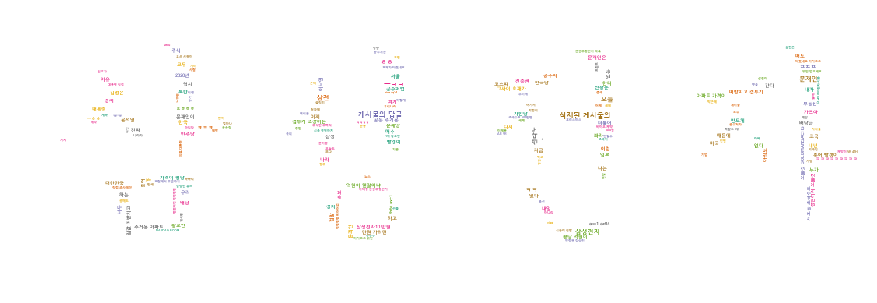

In [8]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube-Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/삼성전자.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

plt.figure(figsize = (15,8))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r", 
               max_words=2000, mask=mask, max_font_size=500, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_삼성전자.pdf')

## (5) 인간지표 별 주가 그래프 그리기

In [9]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()
df_hodu.tail()

,안티,중립,찬티
날짜,,,
2019.12.29,139.0,90.0,189.0
2019.12.30,131.0,129.0,288.0
2019.12.31,120.0,160.0,297.0
2020.01.01,149.0,136.0,313.0
2020.01.02,184.0,130.0,402.0


In [10]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [14]:
date, daily_close = daily_stock_close("005930")

In [16]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})
df_close.head()

,날짜,종가
0,2020.01.02,55200
1,2019.12.30,55800
2,2019.12.27,56500
3,2019.12.26,55400
4,2019.12.24,55000


In [18]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')
df.sort_values(['날짜'], ascending=True, inplace=True)
df.dropna(axis=0, inplace=True)
df['종가'] = df['종가'].astype(int)
df.head()

,날짜,종가,안티,중립,찬티
10,2019.12.16,54700,166.0,121.0,245.0
9,2019.12.17,56700,226.0,220.0,415.0
8,2019.12.18,56300,153.0,175.0,353.0
7,2019.12.19,56000,150.0,129.0,272.0
6,2019.12.20,56000,108.0,162.0,232.0


In [19]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\Windows\\Fonts\\LBRITED.TTF',
 'C:\\Windows\\Fonts\\LBRITEDI.TTF',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\WINDOWS\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\LBRITEI.TTF',
 'C:\\Windows\\Fonts\\BSSYM7.TTF',
 'C:\\Windows\\Fonts\\LATINWD.TTF',
 'C:\\WINDOWS\\Fonts\\BOOKOSBI.TTF',
 'C:\\Windows\\Fonts\\PERBI___.TTF']

In [20]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

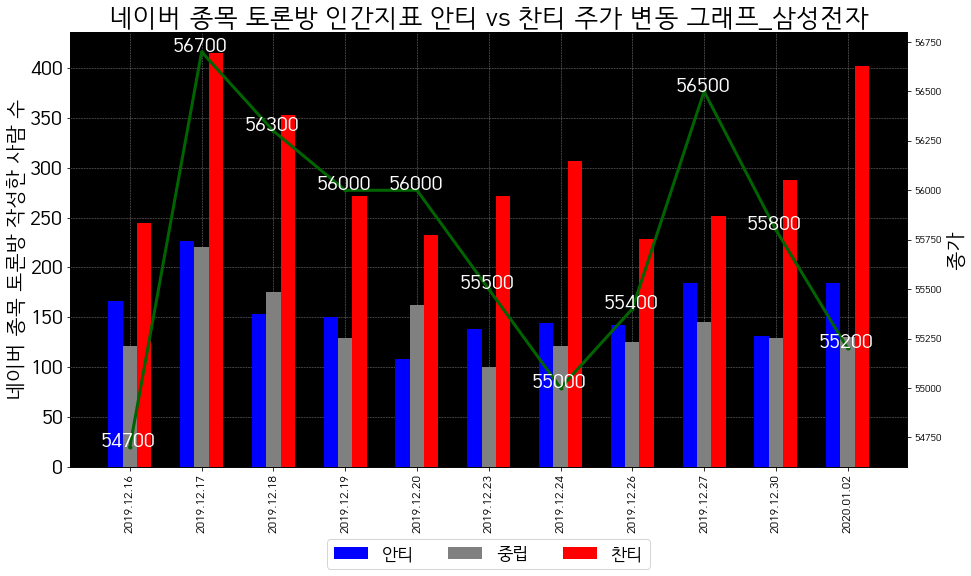

In [21]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_삼성전자', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_삼성전자.png')
plt.show()